Cette première session de NLP va vous donner les bases de la manipulation de texte en vue du data challenge qui vous attend après l'été !

In [ ]:
!pip install spacy
!python -m spacy download fr_core_news_md

# Preprocessing avec spacy

## Chargement de la librairie

- Import the `French` class from `spacy.lang.fr`
- Create the `nlp` object avec le constructeur de la classe `French`
- Create a `doc` and print its text.

In [ ]:
# Importez la classe de langage French
from spacy.lang.____ import ____

# Créez l'objet nlp
nlp = ____

# Traitement du texte
doc = nlp("Ceci est une phrase narcissique puisqu'elle "
          "ne parle que d'elle-même.")

# Affichez le texte du document
print(____.text)

In [340]:
# Importez la classe de langage French
from spacy.lang.fr import French

# Créez l'objet nlp
nlp = French()

# Traitement du texte
doc = nlp("Ceci est une phrase narcissique puisqu'elle "
          "ne parle que d'elle-même.")

# Affichez le texte du document
print(doc.text)

Ceci est une phrase narcissique puisqu'elle ne parle que d'elle-même.


**L'objet NLP**

- contains the processing pipeline
- includes language-specific rules for tokenization etc.

**L'objet doc**

Contient un document, c'est-à-dire un ensemble de *tokens*.

### Manipulation d'un objet `Doc`

L'objet `Doc`se manipule comme une liste. 

A l'aide des `[]`:
- Accedez au premier token de doc
- Selectionnez les mots `'est une'` dans une slice
- Selectionnez les mots entre `'est une phrase narcissique'` dans une slice

In [ ]:
# A slice of the Doc for 'est une'
est_une = ____
print(est_une.text)

# A slice of the Doc for 'est une phrase narcissique'
est_une_phrase_narcissique = ____
print(est_une_phrase_narcissique.text)

### Tokenisation

In [341]:
# Word tokenization
from spacy.lang.en import English

# Load English tokenizer, tagger, parser, NER and word vectors
nlp = English()

text = """When learning data science, you shouldn't get discouraged!
Challenges and setbacks aren't failures, they're just part of the journey. You've got this!"""

#  "nlp" Object is used to create documents with linguistic annotations.
my_doc = nlp(text)

# Create list of word tokens
token_list = []
for token in my_doc:
    token_list.append(token.text)
print(token_list)

['When', 'learning', 'data', 'science', ',', 'you', 'should', "n't", 'get', 'discouraged', '!', '\n', 'Challenges', 'and', 'setbacks', 'are', "n't", 'failures', ',', 'they', "'re", 'just', 'part', 'of', 'the', 'journey', '.', 'You', "'ve", 'got', 'this', '!']


In [342]:
# sentence tokenization

# Load English tokenizer, tagger, parser, NER and word vectors
nlp = English()

# Create the pipeline 'sentencizer' component
sbd = nlp.create_pipe('sentencizer')

# Add the component to the pipeline
nlp.add_pipe(sbd)

text = """When learning data science, you shouldn't get discouraged!
Challenges and setbacks aren't failures, they're just part of the journey. You've got this!"""

#  "nlp" Object is used to create documents with linguistic annotations.
doc = nlp(text)

# create list of sentence tokens
sents_list = []
for sent in doc.sents:
    sents_list.append(sent.text)
print(sents_list)

["When learning data science, you shouldn't get discouraged!", "\nChallenges and setbacks aren't failures, they're just part of the journey.", "You've got this!"]


#### Exercice

In this example, you’ll use spaCy’s `Doc` and `Token` objects, and lexical attributes to find percentages in a text. You’ll be looking for two subsequent tokens: a number and a percent sign.

- Use the `like_num` token attribute to check whether a token in the doc resembles a number.
- Get the token following the current token in the document. The index of the next token in the `doc` is `token.i + 1`.
- Check whether the next token’s text attribute is a percent sign `”%“`.

In [ ]:
from spacy.lang.en import English

nlp = English()

# Process the text
doc = nlp(
    "In 1990, more than 60% of people in East Asia were in extreme poverty. "
    "Now less than 4% are."
)

# Iterate over the tokens in the doc
for token in doc:
    # Check if the token resembles a number
    if ____.____:
        # Get the next token in the document
        next_token = ____[____]
        # Check if the next token's text equals "%"
        if next_token.____ == "%":
            print("Percentage found:", token.text)

### Suppression des stop words

In [337]:
from spacy.lang.fr.stop_words import STOP_WORDS

# print(list(STOP_WORDS)[:10])

['ore', 'particulier', 'ouste', 'tellement', 'quarante', 'tend', 'autrui', 'juste', 'siennes', 'ailleurs']


In [343]:
#Implementation of stop words:
filtered_sent=[]

#  "nlp" Object is used to create documents with linguistic annotations.
doc = nlp(text)

# filtering stop words
for word in doc:
    if word.is_stop==False:
        filtered_sent.append(word)
print("Filtered Sentence:",filtered_sent)

Filtered Sentence: [learning, data, science, ,, discouraged, !, 
, Challenges, setbacks, failures, ,, journey, ., got, !]


In [ ]:
doc = nlp(text)
tokens = [token for token in doc if not token.text in STOP_WORDS]

### Lemmatisation

In [344]:
# Implementing lemmatization
lem = nlp("run runs running runner")
# finding lemma for each word
for word in lem:
    print(word.text,word.lemma_)

run run
runs runs
running running
runner runner


#### Exercice ??

### Etiquetage morpho-synthaxique (POS tags)

**What are statistical models ?**

- Enable spaCy to predict linguistic attributes in context
    - Part-of-speech tags
    - Syntactic dependencies
    - Named entities
- Trained on labeled example texts
- Can be updated with more examples to fine-tune predictions

In [345]:
import spacy
from spacy import displacy

nlp = spacy.load('fr_core_news_md')

In [346]:
# Process a text
doc = nlp("Elle a mangé la pizza")

# Iterate over the tokens
for token in doc:
    # Print the text and the predicted part-of-speech tag
    print(token.text, token.pos_)

Elle PRON
a AUX
mangé VERB
la DET
pizza NOUN


In [347]:
for token in doc:
    print(token.text, token.pos_, token.dep_, token.head.text)
    
displacy.render(doc, style="dep")

Elle PRON nsubj mangé
a AUX aux:tense mangé
mangé VERB ROOT mangé
la DET det pizza
pizza NOUN obj mangé


### Détection d'entités

In [36]:
# Process a text
doc = nlp("Enedis cherche de nouveaux bureaux à Vaison-La-Romaine "
          "avec l'aide de François Cordel.")

# Iterate over the predicted entities
for ent in doc.ents:
    # Print the entity text and its label
    print(ent.text, ent.label_)
    
displacy.render(doc, style="ent")

Enedis ORG
Vaison-La-Romaine LOC
François Cordel PER


In [25]:
spacy.explain("ORG")

'Companies, agencies, institutions, etc.'

In [26]:
spacy.explain("LOC")

'Non-GPE locations, mountain ranges, bodies of water'

In [27]:
spacy.explain("PER")

'Named person or family.'

# Word cloud

Nous allons scrapper la page wikipedia d'Enedis et créer un nuage de mots pour comprendre ce qu'il ressort de l'article. 

- Utilisez le code suivant pour charger la page

In [351]:
import requests
from bs4 import BeautifulSoup
r = requests.get("https://fr.wikipedia.org/wiki/Enedis")
html_doc = r.text
soup = BeautifulSoup(html_doc, 'html.parser')
 
corpus = []
for p in soup.find_all("p"):
    corpus.append(p.text)

join_corpus = " ".join(corpus)
clean_corpus = join_corpus.strip().encode("utf-8").decode("utf-8")
clean_corpus[:70]+"..."

'Enedis, anciennement ERDF (pour Électricité Réseau Distribution France...'

* Importez maintenant `fr_core_news_sm` --> [Documentation](https://spacy.io/models)

In [352]:
# Import de Spacy et initialisation à Francais


In [353]:
# Import de Spacy et initialisation à Francais
import fr_core_news_sm
nlp = fr_core_news_sm.load()
print(nlp)

* Incorporez maintenant votre corpus complet dans spacy via `fr_core_news_sm.load()`

In [354]:
doc = nlp(clean_corpus)

- Installez la librairie wordcloud

In [355]:
!pip install wordcloud

* Avec la librairie `wordcloud`, créez un premier nuage de mots 

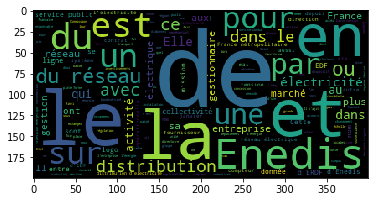

In [356]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wd = WordCloud()
cloud = wd.generate(doc.text)
plt.imshow(cloud)

* Importez maintenant les stop-words de présent dans `spacy`

In [357]:
# Import Stop words 
from spacy.lang.fr.stop_words import STOP_WORDS

* Faites à nouveau un nuage de mots sans les stop words

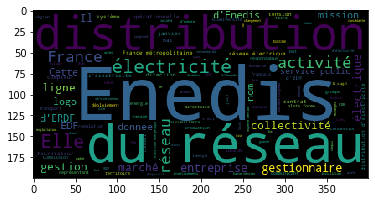

In [358]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wd = WordCloud(stopwords=STOP_WORDS)
cloud = wd.generate(doc.text)
plt.imshow(cloud)

* Enfin nous aurions besoin d'avoir un corpus de mots lemmatisés, recréez un corpus de mots lemmatisés et visualisez votre nouveau nuage de mots

In [359]:
lemma = [token.lemma_ for token in doc if token.lemma_ not in STOP_WORDS]

In [360]:
corpus_lemma = " ".join(lemma)

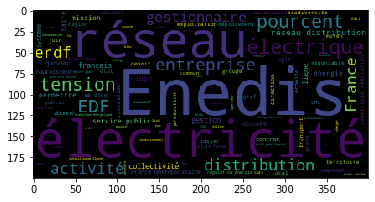

In [361]:
wd = WordCloud()
cloud = wd.generate(corpus_lemma)
plt.imshow(cloud)

# Tuto classification de texte

In [ ]:
#!python -m spacy download en_core_web_sm
#!python -m spacy download en

In [362]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline

## Traitement

In [329]:
!python -m spacy download fr

✔ Download and installation successful
You can now load the model via spacy.load('fr_core_news_sm')
✔ Linking successful
/Users/quentinfresnel/opt/anaconda3/lib/python3.7/site-packages/fr_core_news_sm
-->
/Users/quentinfresnel/opt/anaconda3/lib/python3.7/site-packages/spacy/data/fr
You can now load the model via spacy.load('fr')


In [363]:
import string
from spacy.lang.fr.stop_words import STOP_WORDS
from spacy.lang.fr import French

# Create our list of punctuation marks
punctuations = string.punctuation

# Create our list of stopwords
nlp = spacy.load('fr')
stop_words = spacy.lang.fr.stop_words.STOP_WORDS

# Load English tokenizer, tagger, parser, NER and word vectors
parser = French()

# Creating our tokenizer function
def spacy_tokenizer(sentence):
    # Creating our token object, which is used to create documents with linguistic annotations.
    mytokens = parser(sentence)

    # Lemmatizing each token and converting each token into lowercase
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]

    # Removing stop words
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]

    # return preprocessed list of tokens
    return mytokens

In [364]:
# Custom transformer using spaCy
class predictors(TransformerMixin):
    def transform(self, X, **transform_params):
        # Cleaning Text
        return [clean_text(text) for text in X]

    def fit(self, X, y=None, **fit_params):
        return self

    def get_params(self, deep=True):
        return {}

# Basic function to clean the text
def clean_text(text):
    # Removing spaces and converting text into lowercase
    return text.strip().lower()

In [365]:
bow_vector = CountVectorizer(tokenizer = spacy_tokenizer, ngram_range=(1,1))

In [366]:
tfidf_vector = TfidfVectorizer(tokenizer = spacy_tokenizer)

In [368]:
from sklearn.model_selection import train_test_split

df = pd.read_csv('restaurants.csv')

X = df['texte'] # the features we want to analyze
ylabels = df['label_2'] # the labels, or answers, we want to test against

X_train, X_test, y_train, y_test = train_test_split(X, ylabels, test_size=0.3)

In [369]:
# Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

# Create pipeline using Bag of Words
pipe = Pipeline([("cleaner", predictors()),
                 ('vectorizer', bow_vector),
                 ('classifier', classifier)])

# model generation
pipe.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('cleaner', <__main__.predictors object at 0x1293b63d0>),
                ('vectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 toke...u)\\b\\w\\w+\\b',
                                 tokenizer=<function spacy_tokenizer at 0x12b17d9e0>,
                                 vocabulary=None)),
                ('classifier',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
             

In [370]:
from sklearn import metrics
# Predicting with a test dataset
predicted = pipe.predict(X_test)

# Model Accuracy
print("Logistic Regression Accuracy:",metrics.accuracy_score(y_test, predicted))
# print("Logistic Regression Precision:",metrics.precision_score(y_test, predicted, average='micro'))
# print("Logistic Regression Recall:",metrics.recall_score(y_test, predicted, average='micro'))

Logistic Regression Accuracy: 0.8118811881188119
Logistic Regression Precision: 0.8118811881188119
Logistic Regression Recall: 0.8118811881188119


In [373]:
y_test.values

array([1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0])

In [374]:
predicted

array([1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0])

**Remarque**

La qualité des données initiales a un rôle fondamental.

*Exemple*
- `' '.join(sentences)` --> 75% accuracy
- `'. '.join(sentences)` --> 81% accuracy

## T-SNE ou MiniSOM sur TF IDF

In [ ]:
df['label_3'] # 3 classes pour avoir 3 couleurs

In [1]:
# python -m spacy download fr
# python -m spacy download fr_core_news_md

import spacy
from spacy import displacy

In [ ]:
# analyse factorielle (ACP, projection de texte)

# Tokenization, Stemming, Lemmatization, POS-tagging, Vectorization

In [2]:
# TF-IDF
# Stop words
# Lemmatisation : regroupement des mots d une même famille dans un texte, afin de réduire ces mots à leur forme canonique (le lemme), comme petit, petite, petits, et petites.
# Racinisation (stemming) : regroupement des mots ayant une racine commune et appartenant au même champ lexical.
# Reconnaissance d entités nommées : détermination dans un texte des noms propres, tels que des personnes ou des endroits, ainsi que les quantités, valeurs, ou dates.


# Ressources

Quentin 
https://www.dataquest.io/blog/tutorial-text-classification-in-python-using-spacy/

Gabriel
https://medium.com/@MSalnikov/text-clustering-with-k-means-and-tf-idf-f099bcf95183

Complément
https://www.actuia.com/contribution/victorbigand/tutoriel-tal-pour-les-debutants-classification-de-texte/

## Moins intéressantes

Tuto cloudwords

https://www.datacamp.com/community/tutorials/wordcloud-python

https://www.analyticsvidhya.com/blog/2018/02/the-different-methods-deal-text-data-predictive-python/

1. Basic feature extraction using text data
    - Number of words
    - Number of characters
    - Average word length
    - Number of stopwords
    - Number of special characters
    - Number of numerics
    - Number of uppercase words
2. Basic Text Pre-processing of text data
    - Lower casing
    - Punctuation removal
    - Stopwords removal
    - Frequent words removal
    - Rare words removal
    - Spelling correction
    - Tokenization
    - Stemming
    - Lemmatization
3. Advance Text Processing
    - N-grams
    - Term Frequency
    - Inverse Document Frequency
    - Term Frequency-Inverse Document Frequency (TF-IDF)
    - Bag of Words
    - Sentiment Analysis
    - Word Embedding

https://www.actuia.com/contribution/victorbigand/tutoriel-tal-pour-les-debutants-classification-de-texte/

Classification de texte (spams sur commentaires youtube)

https://towardsdatascience.com/data-scientists-guide-to-summarization-fc0db952e363

**NLTK Summarizer**

We wanted to start our text summarization journey by trying something simple. So we turned to the popular NLP package in python — NLTK. The idea here was to summarize by identifying “top” sentences based on word frequency.

1. tokenize words
    - Pre-process the text by removing numbers, white spaces and ponctuation
    - Remove stopwords
    - Tokenize all words in the document
2. Word frequency
    - Calculate the frequency for every token in the document
3. Sentence selection
    - Sentence score is calculated for every sentence
    - It is the sum of the word frequency of every word in the sentence
    - Top 'n' sentences are selected based on highest sentence scores

In [296]:
nlp = spacy.load('fr_core_news_md') # en_core_web_sm

from spacy.lang.fr.stop_words import STOP_WORDS
STOP_WORDS.add("blabla")
stopwords = STOP_WORDS
print(list(stopwords)[:10])

['ore', 'particulier', 'ouste', 'tellement', 'quarante', 'tend', 'autrui', 'juste', 'siennes', 'ailleurs']


In [4]:
# text = "Ceci est un exemple de texte destiné à tester les différentes librairies Python et à préparer une démonstration. Ce texte a été préparé par Gabriel pour LinkyStat."
# text = 'European authorities fined Google a record $5.1 billion on Wednesday for abusing its power in the mobile phone market and ordered the company to alter its practices'
# text = "The engine coughs and shakes its head. The smoke, a plume of red and white, Waves madly in the face of night. And now the grave incurious stars Gleam on the groaning hurrying cars. Against the kind and awful reign Of darkness, this our angry train, A noisy little rebel, pouts Its brief defiance, flames and shouts— And passes on, and leaves no trace. For darkness holds its ancient place, Serene and absolute, the king Unchanged, of every living thing. The houses lie obscure and still In Rutherford and Carlton Hill. Our lamps intensify the dark Of slumbering Passaic Park. And quiet holds the weary feet That daily tramp through Prospect Street. What though we clang and clank and roar Through all Passaic's streets? No door Will open, not an eye will see Who this loud vagabond may be. Upon my crimson cushioned seat, In manufactured light and heat, I feel unnatural and mean. Outside the towns are cool and clean; Curtained awhile from sound and sight They take God's gracious gift of night. The stars are watchful over them. On Clifton as on Bethlehem The angels, leaning down the sky, Shed peace and gentle dreams. And I— I ride, I blasphemously ride Through all the silent countryside. The engine's shriek, the headlight s glare, Pollute the still nocturnal air. The cottages of Lake View sigh And sleeping, frown as we pass by. Why, even strident Paterson Rests quietly as any nun. Her foolish warring children keep The grateful armistice of sleep. For what tremendous errand's sake Are we so blatantly awake? What precious secret is our freight? What king must be abroad so late? Perhaps Death roams the hills to-night And we rush forth to give him fight. Or else, perhaps, we speed his way To some remote unthinking prey. Perhaps a woman writhes in pain And listens—listens for the train! The train, that like an angel sings, The train, with healing on its wings. Now \"Hawthorne!\" the conductor cries. My neighbor starts and rubs his eyes. He hurries yawning through the car And steps out where the houses are. This is the reason of our quest! Not wantonly we break the rest Of town and village, nor do we Lightly profane night's sanctity. What Love commands the train fulfills, And beautiful upon the hills Are these our feet of burnished steel. Subtly and certainly I feel That Glen Rock welcomes us to her And silent Ridgewood seems to stir And smile, because she knows the train Has brought her children back again. We carry people home—and so God speeds us, wheresoe'er we go. Hohokus, Waldwick, Allendale Lift sleepy heads to give us hail. In Ramsey, Mahwah, Suffern stand Houses that wistfully demand A father—son—some human thing That this, the midnight train, may bring. The trains that travel in the day They hurry folks to work or play. The midnight train is slow and old But of it let this thing be told, To its high honor be it said It carries people home to bed. My cottage lamp shines white and clear. God bless the train that brought me here."
text = "Ce jour-là, 25 mars dernier, Pétersbourg fut le théâtre d’une aventure des plus étranges. Le barbier Ivan Yakovlévitch, domicilié avenue de l’Ascension (son nom de famille est perdu et son enseigne ne porte que l’inscription : On pratique aussi les saignées, au-dessous d’un monsieur à la joue barbouillée de savon), le barbier Ivan Yakovlévitch se réveilla d’assez bonne heure et perçut une odeur de pain chaud. S’étant mis sur son séant, il vit que son épouse – personne plutôt respectable et qui prisait fort le café – défournait des pains tout frais cuits. « Aujourd’hui, Prascovie Ossipovna, je ne prendrai pas de café, déclara Ivan Yakovlévitch ; je préfère grignoter un bon pain chaud avec de la ciboule. » À la vérité, Ivan Yakovlévitch aurait bien voulu et pain et café, mais il jugeait impossible de demander les deux choses à la fois, Prascovie Ossipovna ne tolérant pas de semblables caprices. « Tant mieux, se dit la respectable épouse en jetant un pain sur la table. Que mon nigaud s’empiffre de pain ! Il me restera davantage de café. » Respectueux des convenances, Ivan Yakovlévitch passa son habit par-dessus sa chemise et se mit en devoir de déjeuner. Il posa devant lui une pincée de sel, nettoya deux oignons, prit son couteau et, la mine grave, coupa son pain en deux. Il aperçut alors, à sa grande surprise, un objet blanchâtre au beau milieu ; il le tâta précautionneusement du couteau, le palpa du doigt… « Qu’est-ce que cela peut bien être ? » se dit-il en éprouvant de la résistance. Il fourra alors ses doigts dans le pain et en retira… un nez ! Les bras lui en tombèrent."


In [5]:
print(text)

Ce jour-là, 25 mars dernier, Pétersbourg fut le théâtre d’une aventure des plus étranges. Le barbier Ivan Yakovlévitch, domicilié avenue de l’Ascension (son nom de famille est perdu et son enseigne ne porte que l’inscription : On pratique aussi les saignées, au-dessous d’un monsieur à la joue barbouillée de savon), le barbier Ivan Yakovlévitch se réveilla d’assez bonne heure et perçut une odeur de pain chaud. S’étant mis sur son séant, il vit que son épouse – personne plutôt respectable et qui prisait fort le café – défournait des pains tout frais cuits. « Aujourd’hui, Prascovie Ossipovna, je ne prendrai pas de café, déclara Ivan Yakovlévitch ; je préfère grignoter un bon pain chaud avec de la ciboule. » À la vérité, Ivan Yakovlévitch aurait bien voulu et pain et café, mais il jugeait impossible de demander les deux choses à la fois, Prascovie Ossipovna ne tolérant pas de semblables caprices. « Tant mieux, se dit la respectable épouse en jetant un pain sur la table. Que mon nigaud s’em

In [27]:
# Tokenization
doc = nlp(text)
tokens = [token for token in doc if not token.text in stopwords]

In [28]:
print(tokens)

[Ce, jour, -, ,, 25, mars, ,, Pétersbourg, fut, théâtre, aventure, étranges, ., Le, barbier, Ivan, Yakovlévitch, ,, domicilié, avenue, Ascension, (, nom, famille, perdu, enseigne, porte, inscription, :, On, pratique, saignées, ,, -, monsieur, joue, barbouillée, savon, ), ,, barbier, Ivan, Yakovlévitch, réveilla, bonne, heure, perçut, odeur, pain, chaud, ., S’, mis, séant, ,, vit, épouse, –, respectable, prisait, fort, café, –, défournait, pains, frais, cuits, ., «, Aujourd’hui, ,, Prascovie, Ossipovna, ,, prendrai, café, ,, déclara, Ivan, Yakovlévitch, ;, préfère, grignoter, bon, pain, chaud, ciboule, ., », À, vérité, ,, Ivan, Yakovlévitch, voulu, pain, café, ,, jugeait, impossible, demander, choses, fois, ,, Prascovie, Ossipovna, tolérant, semblables, caprices, ., «, Tant, mieux, ,, respectable, épouse, jetant, pain, table, ., Que, nigaud, empiffre, pain, !, Il, restera, davantage, café, ., », Respectueux, convenances, ,, Ivan, Yakovlévitch, passa, habit, -, chemise, mit, devoir, déje

In [30]:
# Lemmatization
for token in tokens:
    print('Original : %s, New: %s' % (token.text, token.lemma_))

Original : Ce, New: ce
Original : jour, New: jour
Original : -, New: -
Original : ,, New: ,
Original : 25, New: 25
Original : mars, New: mars
Original : ,, New: ,
Original : Pétersbourg, New: Pétersbourg
Original : fut, New: être
Original : théâtre, New: théâtre
Original : aventure, New: aventure
Original : étranges, New: étrange
Original : ., New: .
Original : Le, New: le
Original : barbier, New: barbier
Original : Ivan, New: Ivan
Original : Yakovlévitch, New: Yakovlévitch
Original : ,, New: ,
Original : domicilié, New: domicilier
Original : avenue, New: avenue
Original : Ascension, New: ascension
Original : (, New: (
Original : nom, New: nom
Original : famille, New: famille
Original : perdu, New: perdre
Original : enseigne, New: enseigne
Original : porte, New: porte
Original : inscription, New: inscription
Original : :, New: :
Original : On, New: on
Original : pratique, New: pratique
Original : saignées, New: saignée
Original : ,, New: ,
Original : -, New: -
Original : monsieur, New:

In [31]:
# POS tags

# NP: noun phrase
# DT: determiner
# JJ: adjective
# JJS: adjective, superlative
# NN: noun
# NNP: proper noun, singular
# NNS: noun, plural
# IN: preposition or subordinating conjunction
# VBD: verb, past tense
# VBZ: verb, 3rd person singular present

for token in tokens:
    print('Word: %s, POS: %s' % (token.text, token.tag_))

Word: Ce, POS: DET__Gender=Masc|Number=Sing|PronType=Dem
Word: jour, POS: NOUN__Gender=Masc|Number=Sing
Word: -, POS: PUNCT___
Word: ,, POS: PUNCT___
Word: 25, POS: NUM__NumType=Card
Word: mars, POS: NOUN__Gender=Masc|Number=Sing
Word: ,, POS: PUNCT___
Word: Pétersbourg, POS: PROPN__Gender=Masc|Number=Sing
Word: fut, POS: AUX__Mood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin
Word: théâtre, POS: NOUN__Gender=Masc|Number=Sing
Word: aventure, POS: NOUN__Gender=Fem|Number=Sing
Word: étranges, POS: ADJ__Gender=Masc|Number=Plur
Word: ., POS: PUNCT___
Word: Le, POS: DET__Definite=Def|Gender=Masc|Number=Sing|PronType=Art
Word: barbier, POS: NOUN__Gender=Masc|Number=Sing
Word: Ivan, POS: PROPN__Gender=Masc|Number=Sing
Word: Yakovlévitch, POS: PROPN___
Word: ,, POS: PUNCT___
Word: domicilié, POS: VERB__Gender=Masc|Number=Sing|Tense=Past|VerbForm=Part
Word: avenue, POS: VERB__Gender=Fem|Number=Sing|Tense=Past|VerbForm=Part
Word: Ascension, POS: NOUN__Gender=Fem|Number=Sing
Word: (, POS: PUNC

In [10]:
# Lemmatization and POS tags
[(token.orth_,token.pos_, token.lemma_) for token in
 [y for y in doc if not y.is_stop and y.pos_ != 'PUNCT']]

[('jour', 'NOUN', 'jour'),
 ('25', 'NUM', '25'),
 ('mars', 'NOUN', 'mars'),
 ('Pétersbourg', 'PROPN', 'Pétersbourg'),
 ('fut', 'AUX', 'être'),
 ('théâtre', 'NOUN', 'théâtre'),
 ('aventure', 'NOUN', 'aventure'),
 ('étranges', 'ADJ', 'étrange'),
 ('barbier', 'NOUN', 'barbier'),
 ('Ivan', 'PROPN', 'Ivan'),
 ('Yakovlévitch', 'PROPN', 'Yakovlévitch'),
 ('domicilié', 'VERB', 'domicilier'),
 ('avenue', 'VERB', 'avenue'),
 ('Ascension', 'NOUN', 'ascension'),
 ('nom', 'NOUN', 'nom'),
 ('famille', 'NOUN', 'famille'),
 ('perdu', 'VERB', 'perdre'),
 ('enseigne', 'NOUN', 'enseigne'),
 ('porte', 'VERB', 'porte'),
 ('inscription', 'NOUN', 'inscription'),
 ('pratique', 'NOUN', 'pratique'),
 ('saignées', 'NOUN', 'saignée'),
 ('monsieur', 'NOUN', 'Monsieur'),
 ('joue', 'NOUN', 'joue'),
 ('barbouillée', 'VERB', 'barbouiller'),
 ('savon', 'NOUN', 'savon'),
 ('barbier', 'NOUN', 'barbier'),
 ('Ivan', 'PROPN', 'Ivan'),
 ('Yakovlévitch', 'PROPN', 'Yakovlévitch'),
 ('réveilla', 'VERB', 'réveiller'),
 ('bonne',

In [33]:
# Stemming
import nltk
from nltk.stem.porter import *
stemmer = PorterStemmer()
for token in tokens:
    print('Original : %s, Root form: %s' % (token.text, stemmer.stem(token.text)))

Original : Ce, Root form: Ce
Original : jour, Root form: jour
Original : -, Root form: -
Original : ,, Root form: ,
Original : 25, Root form: 25
Original : mars, Root form: mar
Original : ,, Root form: ,
Original : Pétersbourg, Root form: pétersbourg
Original : fut, Root form: fut
Original : théâtre, Root form: théâtre
Original : aventure, Root form: aventur
Original : étranges, Root form: étrang
Original : ., Root form: .
Original : Le, Root form: Le
Original : barbier, Root form: barbier
Original : Ivan, Root form: ivan
Original : Yakovlévitch, Root form: yakovlévitch
Original : ,, Root form: ,
Original : domicilié, Root form: domicilié
Original : avenue, Root form: avenu
Original : Ascension, Root form: ascens
Original : (, Root form: (
Original : nom, Root form: nom
Original : famille, Root form: famil
Original : perdu, Root form: perdu
Original : enseigne, Root form: enseign
Original : porte, Root form: port
Original : inscription, Root form: inscript
Original : :, Root form: :
Or

In [14]:
# Name-Entity Recognition (NER)

for entity in doc.ents:
    print(entity.text + ' - ' + entity.label_ + ' - ' + str(spacy.explain(entity.label_)))

Pétersbourg - LOC - Non-GPE locations, mountain ranges, bodies of water
Ivan Yakovlévitch - PER - Named person or family.
Ivan Yakovlévitch - PER - Named person or family.
Prascovie Ossipovna - PER - Named person or family.
Ivan Yakovlévitch - PER - Named person or family.
Ivan Yakovlévitch - PER - Named person or family.
Prascovie Ossipovna - PER - Named person or family.
» Respectueux des convenances - MISC - Miscellaneous entities, e.g. events, nationalities, products or works of art
Ivan Yakovlévitch - PER - Named person or family.


In [35]:
# Detecting nouns

for noun in doc.noun_chunks:
    print(noun.text)

Ce jour-là, 25 mars dernier, Pétersbourg fut le théâtre d’une aventure des plus étranges.
Le barbier Ivan Yakovlévitch, domicilié avenue de l’Ascension (
son nom de famille
et son enseigne
On
les saignées
à la joue barbouillée de savon
le barbier Ivan Yakovlévitch
une odeur de pain chaud
il
son épouse – personne plutôt respectable et qui prisait fort le café –
des pains
tout frais cuits
je ne prendrai pas de café, déclara Ivan Yakovlévitch
je
un bon pain chaud avec de la ciboule
Ivan Yakovlévitch
et pain et café
il
les deux choses
Prascovie Ossipovna
de semblables caprices
la respectable épouse en jetant un pain sur la table
mon nigaud
de pain
Il
me
davantage de café
» Respectueux des convenances
Ivan Yakovlévitch
son habit
Il
une pincée de sel
deux oignons
son couteau et, la mine grave
son pain
Il
un objet blanchâtre au beau milieu
il
du couteau
le palpa
du doigt
-ce
cela
il en éprouvant de la résistance
Il
ses doigts
un nez
Les bras lui


In [36]:
# Begin: first token of a multi-token entity
# In: inner token of a multi-token entity
# Last: last token of a multi-token entity
# Unit: single-token entity
# Out: non-entity token

print([(token, token.ent_iob_, token.ent_type_) for token in doc])

[(Ce, 'O', ''), (jour, 'O', ''), (-, 'O', ''), (,, 'O', ''), (25, 'O', ''), (mars, 'O', ''), (,, 'O', ''), (Pétersbourg, 'B', 'LOC'), (fut, 'O', ''), (théâtre, 'O', ''), (aventure, 'O', ''), (étranges, 'O', ''), (., 'O', ''), (Le, 'O', ''), (barbier, 'O', ''), (Ivan, 'B', 'PER'), (Yakovlévitch, 'I', 'PER'), (,, 'O', ''), (domicilié, 'O', ''), (avenue, 'O', ''), (Ascension, 'O', ''), ((, 'O', ''), (nom, 'O', ''), (famille, 'O', ''), (perdu, 'O', ''), (enseigne, 'O', ''), (porte, 'O', ''), (inscription, 'O', ''), (:, 'O', ''), (On, 'O', ''), (pratique, 'O', ''), (saignées, 'O', ''), (,, 'O', ''), (-, 'O', ''), (monsieur, 'O', ''), (joue, 'O', ''), (barbouillée, 'O', ''), (savon, 'O', ''), (), 'O', ''), (,, 'O', ''), (barbier, 'O', ''), (Ivan, 'B', 'PER'), (Yakovlévitch, 'I', 'PER'), (réveilla, 'O', ''), (bonne, 'O', ''), (heure, 'O', ''), (perçut, 'O', ''), (odeur, 'O', ''), (pain, 'O', ''), (chaud, 'O', ''), (., 'O', ''), (S’, 'O', ''), (mis, 'O', ''), (séant, 'O', ''), (,, 'O', ''), (v

In [17]:
displacy.render(nlp(str(text)), jupyter=True, style='ent')

In [18]:
displacy.render(nlp(str(text)), style='dep', jupyter = True, options = {'distance': 120})

### Bonus de spacy

#### Similarité

- `spaCy` can compare two objects and predict similarity
- `Doc.similarity()`, `Span.similarity()` and `Token.similarity()`
- Take another object and return a similarity score (`0` to `1`)
- Important: needs a model that has word vectors included, for example:
    - ✅ `en_core_web_md` (medium model)
    - ✅ `en_core_web_lg` (large model)
    - 🚫 NOT `en_core_web_sm` (small model)

In [ ]:
# Load a larger model with vectors
nlp = spacy.load("en_core_web_md")

# Compare two documents
doc1 = nlp("I like fast food")
doc2 = nlp("I like pizza")
print(doc1.similarity(doc2))

In [33]:
# Compare two tokens
doc = nlp("I like pizza and pasta")
token1 = doc[2]
token2 = doc[4]
print(token1.similarity(token2))

1.0


#### Matcher

- Lists of dictionaries, one per token
- Match exact token texts `[{"TEXT": "iPhone"}, {"TEXT": "X"}]`
- Match lexical attributes `[{"LOWER": "iphone"}, {"LOWER": "x"}]`
- Match any token attributes `[{"LEMMA": "buy"}, {"POS": "NOUN"}]`

In [ ]:
import spacy

# Import the Matcher
from spacy.matcher import Matcher

# Load a model and create the nlp object
nlp = spacy.load("fr_core_news_md")

# Initialize the matcher with the shared vocab
matcher = Matcher(nlp.vocab)

# Add the pattern to the matcher
pattern = [{"TEXT": "iPhone"}, {"TEXT": "X"}]
matcher.add("IPHONE_PATTERN", None, pattern)

# Process some text
doc = nlp("Upcoming iPhone X release date leaked")

# Call the matcher on the doc
matches = matcher(doc)

In [ ]:
pattern = [
    {"IS_DIGIT": True},
    {"LOWER": "fifa"},
    {"LOWER": "world"},
    {"LOWER": "cup"},
    {"IS_PUNCT": True}
]
doc = nlp("2018 FIFA World Cup: France won!")

**Pour aller plus loin avec spacy**

N'hésitez pas à consulter ce tuto qui est très bien fait -> https://course.spacy.io/en/chapter1

# Brouillon

## Gabriel

In [ ]:
# text = "Ceci est un exemple de texte destiné à tester les différentes librairies Python et à préparer une démonstration. Ce texte a été préparé par Gabriel pour LinkyStat."
# text = 'European authorities fined Google a record $5.1 billion on Wednesday for abusing its power in the mobile phone market and ordered the company to alter its practices'
# text = "The engine coughs and shakes its head. The smoke, a plume of red and white, Waves madly in the face of night. And now the grave incurious stars Gleam on the groaning hurrying cars. Against the kind and awful reign Of darkness, this our angry train, A noisy little rebel, pouts Its brief defiance, flames and shouts— And passes on, and leaves no trace. For darkness holds its ancient place, Serene and absolute, the king Unchanged, of every living thing. The houses lie obscure and still In Rutherford and Carlton Hill. Our lamps intensify the dark Of slumbering Passaic Park. And quiet holds the weary feet That daily tramp through Prospect Street. What though we clang and clank and roar Through all Passaic's streets? No door Will open, not an eye will see Who this loud vagabond may be. Upon my crimson cushioned seat, In manufactured light and heat, I feel unnatural and mean. Outside the towns are cool and clean; Curtained awhile from sound and sight They take God's gracious gift of night. The stars are watchful over them. On Clifton as on Bethlehem The angels, leaning down the sky, Shed peace and gentle dreams. And I— I ride, I blasphemously ride Through all the silent countryside. The engine's shriek, the headlight s glare, Pollute the still nocturnal air. The cottages of Lake View sigh And sleeping, frown as we pass by. Why, even strident Paterson Rests quietly as any nun. Her foolish warring children keep The grateful armistice of sleep. For what tremendous errand's sake Are we so blatantly awake? What precious secret is our freight? What king must be abroad so late? Perhaps Death roams the hills to-night And we rush forth to give him fight. Or else, perhaps, we speed his way To some remote unthinking prey. Perhaps a woman writhes in pain And listens—listens for the train! The train, that like an angel sings, The train, with healing on its wings. Now \"Hawthorne!\" the conductor cries. My neighbor starts and rubs his eyes. He hurries yawning through the car And steps out where the houses are. This is the reason of our quest! Not wantonly we break the rest Of town and village, nor do we Lightly profane night's sanctity. What Love commands the train fulfills, And beautiful upon the hills Are these our feet of burnished steel. Subtly and certainly I feel That Glen Rock welcomes us to her And silent Ridgewood seems to stir And smile, because she knows the train Has brought her children back again. We carry people home—and so God speeds us, wheresoe'er we go. Hohokus, Waldwick, Allendale Lift sleepy heads to give us hail. In Ramsey, Mahwah, Suffern stand Houses that wistfully demand A father—son—some human thing That this, the midnight train, may bring. The trains that travel in the day They hurry folks to work or play. The midnight train is slow and old But of it let this thing be told, To its high honor be it said It carries people home to bed. My cottage lamp shines white and clear. God bless the train that brought me here."

text = "Ce jour-là, 25 mars dernier, Pétersbourg fut le théâtre d’une aventure"
"des plus étranges. Le barbier Ivan Yakovlévitch, domicilié avenue de"
"l’Ascension (son nom de famille est perdu et son enseigne ne porte que"
"l’inscription : On pratique aussi les saignées, au-dessous d’un monsieur"
"à la joue barbouillée de savon), le barbier Ivan Yakovlévitch se réveilla"
"d’assez bonne heure et perçut une odeur de pain chaud. S’étant mis sur"
"son séant, il vit que son épouse – personne plutôt respectable et qui"
"prisait fort le café – défournait des pains tout frais cuits."
" « Aujourd’hui, Prascovie Ossipovna, je ne prendrai pas de café, déclara"
"Ivan Yakovlévitch ; je préfère grignoter un bon pain chaud avec de la"
"ciboule. » À la vérité, Ivan Yakovlévitch aurait bien voulu et pain et"
"café, mais il jugeait impossible de demander les deux choses à la fois,"
""" Prascovie Ossipovna ne tolérant pas de semblables caprices. « Tant"
"mieux, se dit la respectable épouse en jetant un pain sur la table. Que"
"mon nigaud s’empiffre de pain ! Il me restera davantage de café. »"
" Respectueux des convenances, Ivan Yakovlévitch passa son habit"
"par-dessus sa chemise et se mit en devoir de déjeuner. Il posa devant"
"lui une pincée de sel, nettoya deux oignons, prit son couteau et, la"
"mine grave, coupa son pain en deux. Il aperçut alors, à sa grande"
"surprise, un objet blanchâtre au beau milieu ; il le tâta"
"précautionneusement du couteau, le palpa du doigt… « Qu’est-ce que cela"
"peut bien être ? » se dit-il en éprouvant de la résistance. Il fourra"
"alors ses doigts dans le pain et en retira… un nez ! Les bras lui en"
"tombèrent."

In [298]:
nlp = spacy.load('fr_core_news_md') # en_core_web_sm

from spacy.lang.fr.stop_words import STOP_WORDS
STOP_WORDS.add("blabla")
stopwords = STOP_WORDS
print(list(stopwords)[:10])

['ore', 'particulier', 'ouste', 'tellement', 'quarante', 'tend', 'autrui', 'juste', 'siennes', 'ailleurs']


In [5]:
print(text)

Ce jour-là, 25 mars dernier, Pétersbourg fut le théâtre d’une aventure des plus étranges. Le barbier Ivan Yakovlévitch, domicilié avenue de l’Ascension (son nom de famille est perdu et son enseigne ne porte que l’inscription : On pratique aussi les saignées, au-dessous d’un monsieur à la joue barbouillée de savon), le barbier Ivan Yakovlévitch se réveilla d’assez bonne heure et perçut une odeur de pain chaud. S’étant mis sur son séant, il vit que son épouse – personne plutôt respectable et qui prisait fort le café – défournait des pains tout frais cuits. « Aujourd’hui, Prascovie Ossipovna, je ne prendrai pas de café, déclara Ivan Yakovlévitch ; je préfère grignoter un bon pain chaud avec de la ciboule. » À la vérité, Ivan Yakovlévitch aurait bien voulu et pain et café, mais il jugeait impossible de demander les deux choses à la fois, Prascovie Ossipovna ne tolérant pas de semblables caprices. « Tant mieux, se dit la respectable épouse en jetant un pain sur la table. Que mon nigaud s’em

In [4]:
# text = "Ceci est un exemple de texte destiné à tester les différentes librairies Python et à préparer une démonstration. Ce texte a été préparé par Gabriel pour LinkyStat."
# text = 'European authorities fined Google a record $5.1 billion on Wednesday for abusing its power in the mobile phone market and ordered the company to alter its practices'
# text = "The engine coughs and shakes its head. The smoke, a plume of red and white, Waves madly in the face of night. And now the grave incurious stars Gleam on the groaning hurrying cars. Against the kind and awful reign Of darkness, this our angry train, A noisy little rebel, pouts Its brief defiance, flames and shouts— And passes on, and leaves no trace. For darkness holds its ancient place, Serene and absolute, the king Unchanged, of every living thing. The houses lie obscure and still In Rutherford and Carlton Hill. Our lamps intensify the dark Of slumbering Passaic Park. And quiet holds the weary feet That daily tramp through Prospect Street. What though we clang and clank and roar Through all Passaic's streets? No door Will open, not an eye will see Who this loud vagabond may be. Upon my crimson cushioned seat, In manufactured light and heat, I feel unnatural and mean. Outside the towns are cool and clean; Curtained awhile from sound and sight They take God's gracious gift of night. The stars are watchful over them. On Clifton as on Bethlehem The angels, leaning down the sky, Shed peace and gentle dreams. And I— I ride, I blasphemously ride Through all the silent countryside. The engine's shriek, the headlight s glare, Pollute the still nocturnal air. The cottages of Lake View sigh And sleeping, frown as we pass by. Why, even strident Paterson Rests quietly as any nun. Her foolish warring children keep The grateful armistice of sleep. For what tremendous errand's sake Are we so blatantly awake? What precious secret is our freight? What king must be abroad so late? Perhaps Death roams the hills to-night And we rush forth to give him fight. Or else, perhaps, we speed his way To some remote unthinking prey. Perhaps a woman writhes in pain And listens—listens for the train! The train, that like an angel sings, The train, with healing on its wings. Now \"Hawthorne!\" the conductor cries. My neighbor starts and rubs his eyes. He hurries yawning through the car And steps out where the houses are. This is the reason of our quest! Not wantonly we break the rest Of town and village, nor do we Lightly profane night's sanctity. What Love commands the train fulfills, And beautiful upon the hills Are these our feet of burnished steel. Subtly and certainly I feel That Glen Rock welcomes us to her And silent Ridgewood seems to stir And smile, because she knows the train Has brought her children back again. We carry people home—and so God speeds us, wheresoe'er we go. Hohokus, Waldwick, Allendale Lift sleepy heads to give us hail. In Ramsey, Mahwah, Suffern stand Houses that wistfully demand A father—son—some human thing That this, the midnight train, may bring. The trains that travel in the day They hurry folks to work or play. The midnight train is slow and old But of it let this thing be told, To its high honor be it said It carries people home to bed. My cottage lamp shines white and clear. God bless the train that brought me here."
text = "Ce jour-là, 25 mars dernier, Pétersbourg fut le théâtre d’une aventure des plus étranges. Le barbier Ivan Yakovlévitch, domicilié avenue de l’Ascension (son nom de famille est perdu et son enseigne ne porte que l’inscription : On pratique aussi les saignées, au-dessous d’un monsieur à la joue barbouillée de savon), le barbier Ivan Yakovlévitch se réveilla d’assez bonne heure et perçut une odeur de pain chaud. S’étant mis sur son séant, il vit que son épouse – personne plutôt respectable et qui prisait fort le café – défournait des pains tout frais cuits. « Aujourd’hui, Prascovie Ossipovna, je ne prendrai pas de café, déclara Ivan Yakovlévitch ; je préfère grignoter un bon pain chaud avec de la ciboule. » À la vérité, Ivan Yakovlévitch aurait bien voulu et pain et café, mais il jugeait impossible de demander les deux choses à la fois, Prascovie Ossipovna ne tolérant pas de semblables caprices. « Tant mieux, se dit la respectable épouse en jetant un pain sur la table. Que mon nigaud s’empiffre de pain ! Il me restera davantage de café. » Respectueux des convenances, Ivan Yakovlévitch passa son habit par-dessus sa chemise et se mit en devoir de déjeuner. Il posa devant lui une pincée de sel, nettoya deux oignons, prit son couteau et, la mine grave, coupa son pain en deux. Il aperçut alors, à sa grande surprise, un objet blanchâtre au beau milieu ; il le tâta précautionneusement du couteau, le palpa du doigt… « Qu’est-ce que cela peut bien être ? » se dit-il en éprouvant de la résistance. Il fourra alors ses doigts dans le pain et en retira… un nez ! Les bras lui en tombèrent."


In [27]:
# Tokenization
doc = nlp(text)
tokens = [token for token in doc if not token.text in stopwords]

In [28]:
print(tokens)

[Ce, jour, -, ,, 25, mars, ,, Pétersbourg, fut, théâtre, aventure, étranges, ., Le, barbier, Ivan, Yakovlévitch, ,, domicilié, avenue, Ascension, (, nom, famille, perdu, enseigne, porte, inscription, :, On, pratique, saignées, ,, -, monsieur, joue, barbouillée, savon, ), ,, barbier, Ivan, Yakovlévitch, réveilla, bonne, heure, perçut, odeur, pain, chaud, ., S’, mis, séant, ,, vit, épouse, –, respectable, prisait, fort, café, –, défournait, pains, frais, cuits, ., «, Aujourd’hui, ,, Prascovie, Ossipovna, ,, prendrai, café, ,, déclara, Ivan, Yakovlévitch, ;, préfère, grignoter, bon, pain, chaud, ciboule, ., », À, vérité, ,, Ivan, Yakovlévitch, voulu, pain, café, ,, jugeait, impossible, demander, choses, fois, ,, Prascovie, Ossipovna, tolérant, semblables, caprices, ., «, Tant, mieux, ,, respectable, épouse, jetant, pain, table, ., Que, nigaud, empiffre, pain, !, Il, restera, davantage, café, ., », Respectueux, convenances, ,, Ivan, Yakovlévitch, passa, habit, -, chemise, mit, devoir, déje

In [30]:
# Lemmatization
for token in tokens:
    print('Original : %s, New: %s' % (token.text, token.lemma_))

Original : Ce, New: ce
Original : jour, New: jour
Original : -, New: -
Original : ,, New: ,
Original : 25, New: 25
Original : mars, New: mars
Original : ,, New: ,
Original : Pétersbourg, New: Pétersbourg
Original : fut, New: être
Original : théâtre, New: théâtre
Original : aventure, New: aventure
Original : étranges, New: étrange
Original : ., New: .
Original : Le, New: le
Original : barbier, New: barbier
Original : Ivan, New: Ivan
Original : Yakovlévitch, New: Yakovlévitch
Original : ,, New: ,
Original : domicilié, New: domicilier
Original : avenue, New: avenue
Original : Ascension, New: ascension
Original : (, New: (
Original : nom, New: nom
Original : famille, New: famille
Original : perdu, New: perdre
Original : enseigne, New: enseigne
Original : porte, New: porte
Original : inscription, New: inscription
Original : :, New: :
Original : On, New: on
Original : pratique, New: pratique
Original : saignées, New: saignée
Original : ,, New: ,
Original : -, New: -
Original : monsieur, New:

In [31]:
# POS tags

# NP: noun phrase
# DT: determiner
# JJ: adjective
# JJS: adjective, superlative
# NN: noun
# NNP: proper noun, singular
# NNS: noun, plural
# IN: preposition or subordinating conjunction
# VBD: verb, past tense
# VBZ: verb, 3rd person singular present

for token in tokens:
    print('Word: %s, POS: %s' % (token.text, token.tag_))

Word: Ce, POS: DET__Gender=Masc|Number=Sing|PronType=Dem
Word: jour, POS: NOUN__Gender=Masc|Number=Sing
Word: -, POS: PUNCT___
Word: ,, POS: PUNCT___
Word: 25, POS: NUM__NumType=Card
Word: mars, POS: NOUN__Gender=Masc|Number=Sing
Word: ,, POS: PUNCT___
Word: Pétersbourg, POS: PROPN__Gender=Masc|Number=Sing
Word: fut, POS: AUX__Mood=Ind|Number=Sing|Person=3|Tense=Past|VerbForm=Fin
Word: théâtre, POS: NOUN__Gender=Masc|Number=Sing
Word: aventure, POS: NOUN__Gender=Fem|Number=Sing
Word: étranges, POS: ADJ__Gender=Masc|Number=Plur
Word: ., POS: PUNCT___
Word: Le, POS: DET__Definite=Def|Gender=Masc|Number=Sing|PronType=Art
Word: barbier, POS: NOUN__Gender=Masc|Number=Sing
Word: Ivan, POS: PROPN__Gender=Masc|Number=Sing
Word: Yakovlévitch, POS: PROPN___
Word: ,, POS: PUNCT___
Word: domicilié, POS: VERB__Gender=Masc|Number=Sing|Tense=Past|VerbForm=Part
Word: avenue, POS: VERB__Gender=Fem|Number=Sing|Tense=Past|VerbForm=Part
Word: Ascension, POS: NOUN__Gender=Fem|Number=Sing
Word: (, POS: PUNC

In [10]:
# Lemmatization and POS tags
[(token.orth_,token.pos_, token.lemma_) for token in
 [y for y in doc if not y.is_stop and y.pos_ != 'PUNCT']]

[('jour', 'NOUN', 'jour'),
 ('25', 'NUM', '25'),
 ('mars', 'NOUN', 'mars'),
 ('Pétersbourg', 'PROPN', 'Pétersbourg'),
 ('fut', 'AUX', 'être'),
 ('théâtre', 'NOUN', 'théâtre'),
 ('aventure', 'NOUN', 'aventure'),
 ('étranges', 'ADJ', 'étrange'),
 ('barbier', 'NOUN', 'barbier'),
 ('Ivan', 'PROPN', 'Ivan'),
 ('Yakovlévitch', 'PROPN', 'Yakovlévitch'),
 ('domicilié', 'VERB', 'domicilier'),
 ('avenue', 'VERB', 'avenue'),
 ('Ascension', 'NOUN', 'ascension'),
 ('nom', 'NOUN', 'nom'),
 ('famille', 'NOUN', 'famille'),
 ('perdu', 'VERB', 'perdre'),
 ('enseigne', 'NOUN', 'enseigne'),
 ('porte', 'VERB', 'porte'),
 ('inscription', 'NOUN', 'inscription'),
 ('pratique', 'NOUN', 'pratique'),
 ('saignées', 'NOUN', 'saignée'),
 ('monsieur', 'NOUN', 'Monsieur'),
 ('joue', 'NOUN', 'joue'),
 ('barbouillée', 'VERB', 'barbouiller'),
 ('savon', 'NOUN', 'savon'),
 ('barbier', 'NOUN', 'barbier'),
 ('Ivan', 'PROPN', 'Ivan'),
 ('Yakovlévitch', 'PROPN', 'Yakovlévitch'),
 ('réveilla', 'VERB', 'réveiller'),
 ('bonne',

In [33]:
# Stemming
import nltk
from nltk.stem.porter import *
stemmer = PorterStemmer()
for token in tokens:
    print('Original : %s, Root form: %s' % (token.text, stemmer.stem(token.text)))

Original : Ce, Root form: Ce
Original : jour, Root form: jour
Original : -, Root form: -
Original : ,, Root form: ,
Original : 25, Root form: 25
Original : mars, Root form: mar
Original : ,, Root form: ,
Original : Pétersbourg, Root form: pétersbourg
Original : fut, Root form: fut
Original : théâtre, Root form: théâtre
Original : aventure, Root form: aventur
Original : étranges, Root form: étrang
Original : ., Root form: .
Original : Le, Root form: Le
Original : barbier, Root form: barbier
Original : Ivan, Root form: ivan
Original : Yakovlévitch, Root form: yakovlévitch
Original : ,, Root form: ,
Original : domicilié, Root form: domicilié
Original : avenue, Root form: avenu
Original : Ascension, Root form: ascens
Original : (, Root form: (
Original : nom, Root form: nom
Original : famille, Root form: famil
Original : perdu, Root form: perdu
Original : enseigne, Root form: enseign
Original : porte, Root form: port
Original : inscription, Root form: inscript
Original : :, Root form: :
Or

In [14]:
# Name-Entity Recognition (NER)

for entity in doc.ents:
    print(entity.text + ' - ' + entity.label_ + ' - ' + str(spacy.explain(entity.label_)))

Pétersbourg - LOC - Non-GPE locations, mountain ranges, bodies of water
Ivan Yakovlévitch - PER - Named person or family.
Ivan Yakovlévitch - PER - Named person or family.
Prascovie Ossipovna - PER - Named person or family.
Ivan Yakovlévitch - PER - Named person or family.
Ivan Yakovlévitch - PER - Named person or family.
Prascovie Ossipovna - PER - Named person or family.
» Respectueux des convenances - MISC - Miscellaneous entities, e.g. events, nationalities, products or works of art
Ivan Yakovlévitch - PER - Named person or family.


In [35]:
# Detecting nouns

for noun in doc.noun_chunks:
    print(noun.text)

Ce jour-là, 25 mars dernier, Pétersbourg fut le théâtre d’une aventure des plus étranges.
Le barbier Ivan Yakovlévitch, domicilié avenue de l’Ascension (
son nom de famille
et son enseigne
On
les saignées
à la joue barbouillée de savon
le barbier Ivan Yakovlévitch
une odeur de pain chaud
il
son épouse – personne plutôt respectable et qui prisait fort le café –
des pains
tout frais cuits
je ne prendrai pas de café, déclara Ivan Yakovlévitch
je
un bon pain chaud avec de la ciboule
Ivan Yakovlévitch
et pain et café
il
les deux choses
Prascovie Ossipovna
de semblables caprices
la respectable épouse en jetant un pain sur la table
mon nigaud
de pain
Il
me
davantage de café
» Respectueux des convenances
Ivan Yakovlévitch
son habit
Il
une pincée de sel
deux oignons
son couteau et, la mine grave
son pain
Il
un objet blanchâtre au beau milieu
il
du couteau
le palpa
du doigt
-ce
cela
il en éprouvant de la résistance
Il
ses doigts
un nez
Les bras lui


In [36]:
# Begin: first token of a multi-token entity
# In: inner token of a multi-token entity
# Last: last token of a multi-token entity
# Unit: single-token entity
# Out: non-entity token

print([(token, token.ent_iob_, token.ent_type_) for token in doc])

[(Ce, 'O', ''), (jour, 'O', ''), (-, 'O', ''), (,, 'O', ''), (25, 'O', ''), (mars, 'O', ''), (,, 'O', ''), (Pétersbourg, 'B', 'LOC'), (fut, 'O', ''), (théâtre, 'O', ''), (aventure, 'O', ''), (étranges, 'O', ''), (., 'O', ''), (Le, 'O', ''), (barbier, 'O', ''), (Ivan, 'B', 'PER'), (Yakovlévitch, 'I', 'PER'), (,, 'O', ''), (domicilié, 'O', ''), (avenue, 'O', ''), (Ascension, 'O', ''), ((, 'O', ''), (nom, 'O', ''), (famille, 'O', ''), (perdu, 'O', ''), (enseigne, 'O', ''), (porte, 'O', ''), (inscription, 'O', ''), (:, 'O', ''), (On, 'O', ''), (pratique, 'O', ''), (saignées, 'O', ''), (,, 'O', ''), (-, 'O', ''), (monsieur, 'O', ''), (joue, 'O', ''), (barbouillée, 'O', ''), (savon, 'O', ''), (), 'O', ''), (,, 'O', ''), (barbier, 'O', ''), (Ivan, 'B', 'PER'), (Yakovlévitch, 'I', 'PER'), (réveilla, 'O', ''), (bonne, 'O', ''), (heure, 'O', ''), (perçut, 'O', ''), (odeur, 'O', ''), (pain, 'O', ''), (chaud, 'O', ''), (., 'O', ''), (S’, 'O', ''), (mis, 'O', ''), (séant, 'O', ''), (,, 'O', ''), (v

In [17]:
displacy.render(nlp(str(text)), jupyter=True, style='ent')

In [18]:
displacy.render(nlp(str(text)), style='dep', jupyter = True, options = {'distance': 120})

## Classif en anglais

In [42]:
ls datasets

datasets_amazon_alexa.tsv


In [55]:
df_amazon = pd.read_csv ("datasets/amazon_alexa.tsv", sep="\t")

In [56]:
df_amazon.feedback.value_counts()

1    2893
0     257
Name: feedback, dtype: int64

In [57]:
df_amazon

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [48]:
import string
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English

# Create our list of punctuation marks
punctuations = string.punctuation

# Create our list of stopwords
nlp = spacy.load('en')
stop_words = spacy.lang.en.stop_words.STOP_WORDS

# Load English tokenizer, tagger, parser, NER and word vectors
parser = English()

# Creating our tokenizer function
def spacy_tokenizer(sentence):
    # Creating our token object, which is used to create documents with linguistic annotations.
    mytokens = parser(sentence)

    # Lemmatizing each token and converting each token into lowercase
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]

    # Removing stop words
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]

    # return preprocessed list of tokens
    return mytokens

In [49]:
# Custom transformer using spaCy
class predictors(TransformerMixin):
    def transform(self, X, **transform_params):
        # Cleaning Text
        return [clean_text(text) for text in X]

    def fit(self, X, y=None, **fit_params):
        return self

    def get_params(self, deep=True):
        return {}

# Basic function to clean the text
def clean_text(text):
    # Removing spaces and converting text into lowercase
    return text.strip().lower()

In [50]:
bow_vector = CountVectorizer(tokenizer = spacy_tokenizer, ngram_range=(1,1))

In [51]:
tfidf_vector = TfidfVectorizer(tokenizer = spacy_tokenizer)

In [52]:
from sklearn.model_selection import train_test_split

X = df_amazon['verified_reviews'] # the features we want to analyze
ylabels = df_amazon['feedback'] # the labels, or answers, we want to test against

X_train, X_test, y_train, y_test = train_test_split(X, ylabels, test_size=0.3)

In [53]:
# Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

# Create pipeline using Bag of Words
pipe = Pipeline([("cleaner", predictors()),
                 ('vectorizer', bow_vector),
                 ('classifier', classifier)])

# model generation
pipe.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('cleaner', <__main__.predictors object at 0x142f9f290>),
                ('vectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 toke...u)\\b\\w\\w+\\b',
                                 tokenizer=<function spacy_tokenizer at 0x160379680>,
                                 vocabulary=None)),
                ('classifier',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
             

In [54]:
from sklearn import metrics
# Predicting with a test dataset
predicted = pipe.predict(X_test)

# Model Accuracy
print("Logistic Regression Accuracy:",metrics.accuracy_score(y_test, predicted))
print("Logistic Regression Precision:",metrics.precision_score(y_test, predicted))
print("Logistic Regression Recall:",metrics.recall_score(y_test, predicted))

Logistic Regression Accuracy: 0.9375661375661376
Logistic Regression Precision: 0.9433551198257081
Logistic Regression Recall: 0.9919816723940436
